In [64]:
import pandas as pd
from google.colab import files

# CSV-Datei hochladen, am Ende der Ausgabe wird Benutzer/Anwender gebeten, die entsprechende Datei auszuwählen
uploaded = files.upload()

# CSV-Datei laden
df = pd.read_csv('testdaten.csv', sep=';')

#Mit diesem Codesatz kann die Spalte als INT betrachtet werden, statt Strings.
"""Sicherstellen, dass die result-Spalte als int eingelesen wird
df['result'] = df['result'].replace('warning', 2)
df['result'] = pd.to_numeric(df['result'], errors='coerce').fillna(0).astype(int)"""


# Anzahl der NiOs, iOs und Warnungen berechnen, Inhalte der CSV-File in der Spalte result werden als String, statt INT erkannt.
NiO_count = df[df['result'] == '1'].shape[0]
iO_count = df[df['result'] == '0'].shape[0]
warning_count = df[df['result'] == 'warning'].shape[0]

# Gesamtanzahl der Einträge und NiO-Quote berechnen
total_count = df.shape[0]
niO_quote = NiO_count / total_count * 100 if total_count > 0 else 0

# Ergebnisse anzeigen
print(f"NiOs: {NiO_count}, iOs: {iO_count}, Warnungen: {warning_count}, NiO-Quote: {niO_quote:.2f}%")


Saving testdaten.csv to testdaten (14).csv
NiOs: 14, iOs: 956, Warnungen: 30, NiO-Quote: 1.40%


In [154]:
import pandas as pd
import sqlite3
from google.colab import files
import matplotlib.pyplot as plt

# CSV-Datei hochladen, am Ende der Ausgabe wird Benutzer/Anwender gebeten, die entsprechende Datei auszuwählen
uploaded = files.upload()

# Laden der CSV-Datei, Verwendung von 'sep = ';'', da pandas Kommatas erwartet, statt Semikolon
df = pd.read_csv('testdaten.csv', sep=';')

# Verbindung zur SQLite-Datenbank herstellen
conn = sqlite3.connect('testdaten.db')

# DataFrame in die SQLite-Datenbank importieren
df.to_sql('testdaten', conn, if_exists='replace', index=False)

# Abfrage zur Zählung aller Einträge pro Station
query_total_count = "SELECT station, COUNT(*) AS total_count FROM testdaten GROUP BY station"

total_count = pd.read_sql(query_total_count, conn)

# Abfrage zur Zählung der NiOs (result = 1) pro Station
query_NiOs = " SELECT station, COUNT(*) AS NiOs FROM testdaten WHERE result = 1 GROUP BY station"
counted_NiOs = pd.read_sql(query_NiOs, conn)

# Abfrage zur Zählung der iOs (result = 0) pro Station
query_iOs = " SELECT station, COUNT(*) AS iOs FROM testdaten WHERE result = 0 GROUP BY station"
counted_iOs = pd.read_sql(query_iOs, conn)

# Abfrage zur Zählung der Warnungen (result = 'warning') pro Station
query_error = " SELECT station, COUNT(*) AS Warnings FROM testdaten WHERE result = 'warning' GROUP BY station"
counted_err = pd.read_sql(query_error, conn)

# Zusammenführen der Ergebnisse
result = total_count
result = result.merge(counted_NiOs, on='station', how='left').fillna(0).astype({'NiOs': 'int64'})
result = result.merge(counted_iOs, on='station', how='left').fillna(0).astype({'iOs': 'int64'})
result = result.merge(counted_err, on='station', how='left').fillna(0).astype({'Warnings': 'int64'})

# Abfrage zur Zählung aller Einträge
query_total_count = "SELECT COUNT(*) AS total_count FROM testdaten"
total_count = pd.read_sql(query_total_count, conn).iloc[0]['total_count']

# Abfrage zur Zählung der NiOs (result = 1)
query_NiOs = "SELECT COUNT(*) AS NiOs FROM testdaten WHERE result = 1"
counted_NiOs = pd.read_sql(query_NiOs, conn).iloc[0]['NiOs']

# Abfrage zur Zählung der iOs (result = 0)
query_iOs = "SELECT COUNT(*) AS iOs FROM testdaten WHERE result = 0"
counted_iOs = pd.read_sql(query_iOs, conn).iloc[0]['iOs']

# Abfrage zur Zählung der Warnungen (result = 2)
query_error = "SELECT COUNT(*) AS Warnings FROM testdaten WHERE result = 'warning'"
counted_err = pd.read_sql(query_error, conn).iloc[0]['Warnings']

# NiO-Quote berechnen
niO_quote = counted_NiOs / total_res_count * 100 if total_count > 0 else 0

# Ergebnis anzeigen
print(f"\nInsgesamt: {total_count}, NiOs: {counted_NiOs}, iOs: {counted_iOs}, Warnungen: {counted_err}, NiO-Quote: {niO_quote:.2f}% \n")

# Berechnung der NiO-Quote pro Station
result['NiO_Quote'] = (result['NiOs'] / result['total_count']) * 100

# Ergebnis anzeigen
print(f"{result} \n")

# Abfrage für den zeitlichen Verlauf von var2
query_var2_timeline = "SELECT date, var2 FROM testdaten ORDER BY date"

# Ergebnis der Abfrage ausführen und anzeigen
var2_timeline = pd.read_sql(query_var2_timeline, conn)
var2_timeline['date'] = pd.to_datetime(var2_timeline['date'])

print(var2_timeline)


Saving testdaten.csv to testdaten (15).csv

Insgesamt: 1000, NiOs: 14, iOs: 956, Warnungen: 30, NiO-Quote: 1.40% 

  station  total_count  NiOs  iOs  Warnings  NiO_Quote
0     ST1          666     5  652         9   0.750751
1     ST2          143     9  113        21   6.293706
2     ST3          191     0  191         0   0.000000 

                   date   var2
0   2023-10-24 13:39:52   -2,1
1   2023-10-24 14:16:01  -2,15
2   2023-10-24 14:46:48  -2,19
3   2023-10-24 14:55:58  -2,15
4   2023-10-24 15:00:18  -2,16
..                  ...    ...
995 2024-01-21 14:08:26  -2,66
996 2024-01-21 14:10:18  -2,66
997 2024-01-21 14:12:10   -2,7
998 2024-01-21 14:14:01  -2,68
999 2024-01-21 14:23:49  -2,87

[1000 rows x 2 columns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving testdaten.csv to testdaten (95).csv


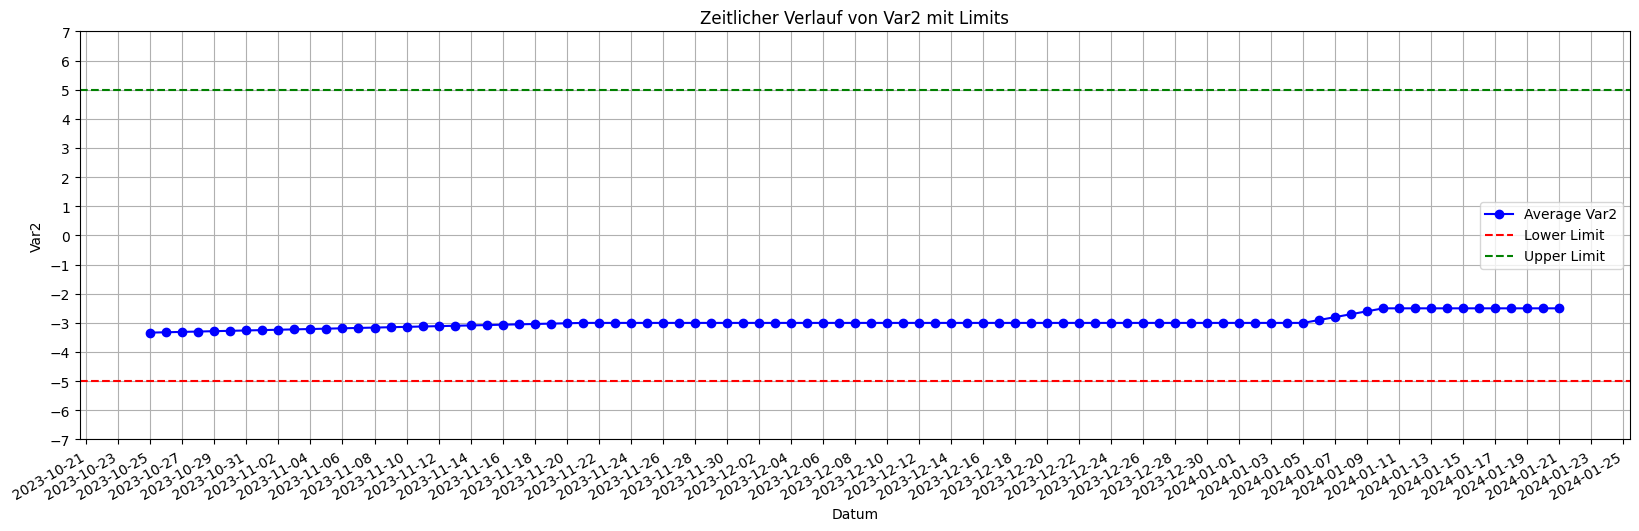

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import matplotlib.dates as mdates
import sqlite3

# CSV-Datei hochladen
uploaded = files.upload()

# Laden der CSV-Datei
df = pd.read_csv('testdaten.csv', sep=';')

# Verbindung zur SQLite-Datenbank herstellen (Datei-basiert)
conn = sqlite3.connect('testdaten.db')

# DataFrame in die SQLite-Datenbank importieren
df.to_sql('testdaten', conn, if_exists='replace', index=False)

# Abfrage für den zeitlichen Verlauf von var2
query_var2_timeline = "SELECT date, var2 FROM testdaten ORDER BY date"

# Ergebnis der Abfrage ausführen und anzeigen
var2_timeline = pd.read_sql(query_var2_timeline, conn)
var2_timeline['date'] = pd.to_datetime(var2_timeline['date'])

# Konvertieren der var2-Spalte in numerische Werte
var2_timeline['var2'] = pd.to_numeric(var2_timeline['var2'], errors='coerce')

# Berechnen des täglichen Durchschnitts von var2
daily_avg = var2_timeline.groupby(var2_timeline['date'].dt.date)['var2'].mean().reset_index()
daily_avg['date'] = pd.to_datetime(daily_avg['date'])

# Erstellen einer vollständigen Zeitreihe mit allen Tagen
all_days = pd.date_range(start=daily_avg['date'].min(), end=daily_avg['date'].max(), freq='D')
daily_avg = daily_avg.set_index('date').reindex(all_days).rename_axis('date').reset_index()

# Fehlende Werte interpolieren
daily_avg['var2'] = daily_avg['var2'].interpolate()

# Daten für das Plotten vorbereiten
dates = daily_avg['date']
var2_avg = daily_avg['var2']

# Plot erstellen
fig, ax = plt.subplots(figsize=(20, 6))

ax.plot(dates, var2_avg, marker='o', linestyle='-', color='b', label='Average Var2')

# Hinzufügen der horizontalen Limits
ax.axhline(y=-5, color='r', linestyle='--', label='Lower Limit')
ax.axhline(y=5, color='g', linestyle='--', label='Upper Limit')

# Achsenbeschriftungen und Titel hinzufügen
ax.set(xlabel='Datum', ylabel='Var2', title='Zeitlicher Verlauf von Var2 mit Limits')

# Gitterlinien hinzufügen
ax.grid()

# Legende hinzufügen
ax.legend()

# Y-Achsenbereich und -beschriftungen anpassen
ax.set_ylim([-7, 7])
ax.set_yticks(np.arange(-7, 8, 1))

# X-Achse in zweitägigen Schritten anzeigen
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# X-Achse rotieren, um die Daten besser lesbar zu machen
fig.autofmt_xdate()

# Anpassung der Ränder (Margins)
ax.margins(x=0.05, y=0.1)

plt.show()
